
# Exploratory Data Analysis Insurance Dataset 

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Tasks](#section3)
    - * [Task 1: Importing libraries and Exploring the Dataset](#section301)<br/>
    - * [Task 2: Checking missing values and Outliers](#section302)<br/>
    - * [Task 3: Creating visual methods to analyze the data](#section303)<br/>
    - * [Task 4:Analyzing trends, patterns, and relationships in the Data](#section304)<br/>
4. [Conclusions](#section4)<br/>  




### 1. Problem Statement

The notebooks explores the basic use of __Pandas__,__seaborn__,__matplotlib__,__Scipy__ With __Pre-Processing__,__Data Cleaning__ for Analyses Purpose __Exploratory Data Analysis(EDA)__.
<br>
In this project, I learned practically how to create and apply graphical techniques in exploratory data analysis (EDA).


* __Exploratory Data Analysis__ <br/>
Understand the data by EDA and derive simple models with Pandas as baseline.
EDA ia a critical and first step in analyzing the data and we do this for below reasons :
   
   We will go through 4 tasks to implement our project:
   
    - __Task 1:__ Importing libraries and Exploring the Dataset.
    - __Task 2:__ Checking missing values and Outliers.
    - __Task 3:__ Creating visual methods to analyze the data.
    - __Task 3.1:__ <i>Univariate Anlyses----</i> <i>Bivariate Analyses----</i> <i>Multivariate Analyses</i>
    - __Task 4:__ Analyzing trends, patterns, and relationships in the Data.

### 2. Data Loading and Description

<a id=section2></a>

- The dataset consists information collected from Kaggle Insurance Premium Prediction for study/practice.

- The dataset comprises of __1338 observations of 7 columns__. Below is a table showing names of all the columns and their description.

## 3. Tasks 

# Task 1: Importing libraries and Exploring the Dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns # For statistical Data Visualization
import statsmodels.api as sm
import scipy.stats as stats # For Scientific Computing
from sklearn.preprocessing import LabelEncoder # Python
import copy
sns.set() #setting the default seaborn style for our plots

In [2]:
# Read the Dataset
insurance_df = pd.read_csv("D:/Insurance Dataset/insurance.csv")

In [3]:
#Display the first 10 examples in the dataset

insurance_df.head(10) ### Fill out the Number of examples

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [4]:
#Info about the data shape of data, type of individual columns

insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Expected output:

     The data should consist of 1338 instances with 7 attributes. 2 integer type, 2 float type and 3 object type (Strings in the column)

In [5]:
all_columns         = list(insurance_df)
numeric_columns     = ['age', 'bmi', 'children', 'expenses']
categorical_columns = [x for x in all_columns if x not in numeric_columns ]

print('\nNumeric columns')
print(numeric_columns)
print('\nCategorical columns')
print(categorical_columns)


Numeric columns
['age', 'bmi', 'children', 'expenses']

Categorical columns
['sex', 'smoker', 'region']


# Task 2: Checking missing values and Outliers

In [6]:
# Check for the null values 
insurance_df.isna().apply(pd.value_counts) 

,age,sex,bmi,children,smoker,region,expenses
False,1338,1338,1338,1338,1338,1338,1338


Expected Output:
    
    There shouldn't be any missing values

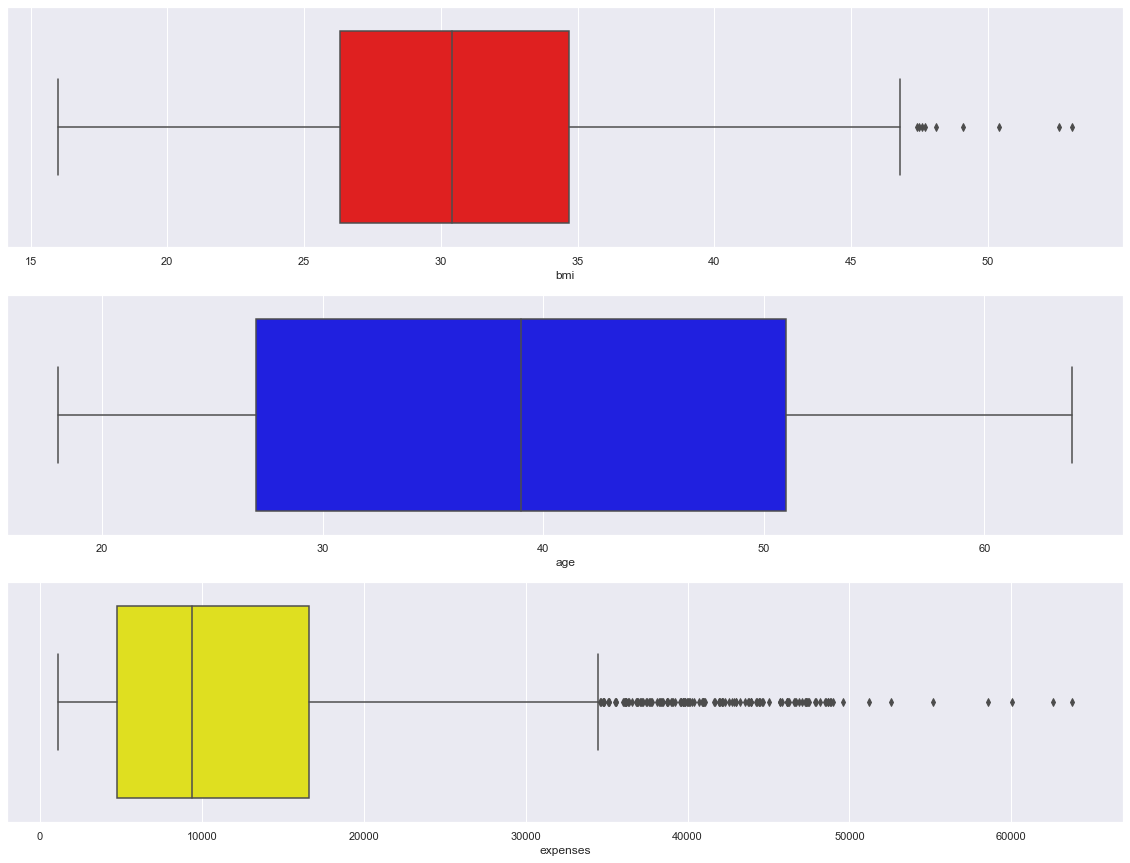

In [7]:
# Checking for the outliers
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(x= insurance_df.bmi, color='red')


plt.subplot(3,1,2)
sns.boxplot(x= insurance_df.age, color='blue')

plt.subplot(3,1,3)
sns.boxplot(x= insurance_df.expenses, color='yellow')




plt.show()

Output should include this Analysis:

- bmi has a few extreme values.

- Expenses/charges as it is highly skewed, there are quiet a lot of extreme values.

In [8]:
# a brief summary for the dataset

insurance_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.00,27.0000,39.00,51.000,64.00
bmi,1338.0,30.665471,6.098382,16.00,26.3000,30.40,34.700,53.10
children,1338.0,1.094918,1.205493,0.00,0.0000,1.00,2.000,5.00
expenses,1338.0,13270.422414,12110.011240,1121.87,4740.2875,9382.03,16639.915,63770.43


Output should include this Analysis:

- All the statistics seem reasonable.

- Age column: data looks representative of the true age distribution of the adult population with (39) mean.

- Children Column: Few people have more than 2 children (75% of the people have 2 or less children).

- The claimed amount is higly skewed as most people would require basic medi-care and only few suffer from diseases which cost more to get rid of.

# Task 3: Creating visual methods to analyze the data.

## 3.1 <i>Univariate Analyses</i>

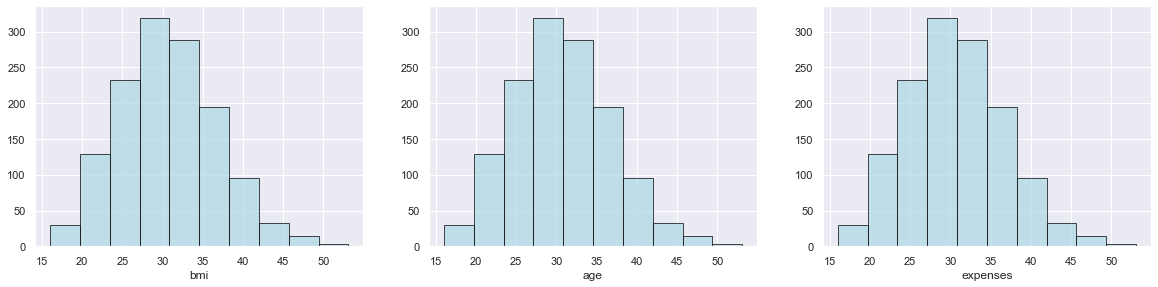

In [9]:
# Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('bmi')

plt.subplot(3,3,2)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('age')

plt.subplot(3,3,3)
plt.hist(insurance_df.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('expenses')


plt.show()

<AxesSubplot:xlabel='bmi'>

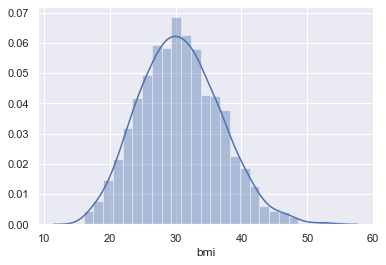

In [10]:
sns.distplot(insurance_df['bmi'])

<AxesSubplot:xlabel='age'>

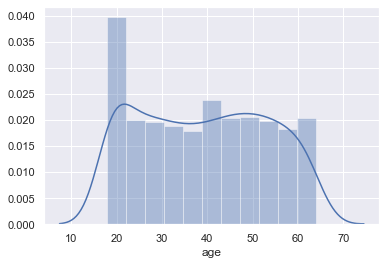

In [11]:
sns.distplot(insurance_df['age'])

<AxesSubplot:xlabel='expenses'>

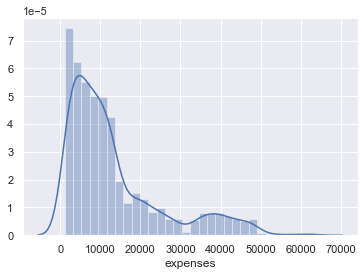

In [12]:
sns.distplot(insurance_df['expenses'])


Output should include this Analysis:

- bmi looks normally distributed.

- Age looks uniformly distributed.

- As seen in the previous step, charges are highly skewed.

- A uniform distribution is one in which all values are equally likely within a range (and impossible beyond that range). The Normal Distribution is a specific distribution and is not simply any distribution that is bell shaped. Its mean , median and mode are equal.

In [13]:
# showing the skewness of variables
Skewness = Skewness = pd.DataFrame({'Skewness' : [stats.skew(insurance_df.bmi),stats.skew(insurance_df.age),stats.skew(insurance_df.expenses)]},
                        index=['bmi','age','expenses']) # MEasure /Skewness of required Columns
Skewness

# We Will Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.284274
age,0.055610
expenses,1.514180


Output should include this Analysis:

- Skewness of bmi is very low as seen in the previous step

- age is uniformly distributed and thus not skewed

- charges are highly skewed

Text(0, 0.5, 'count')

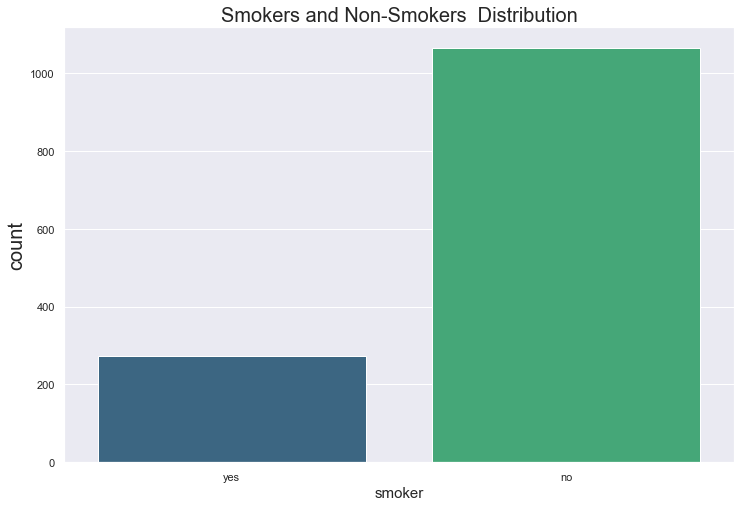

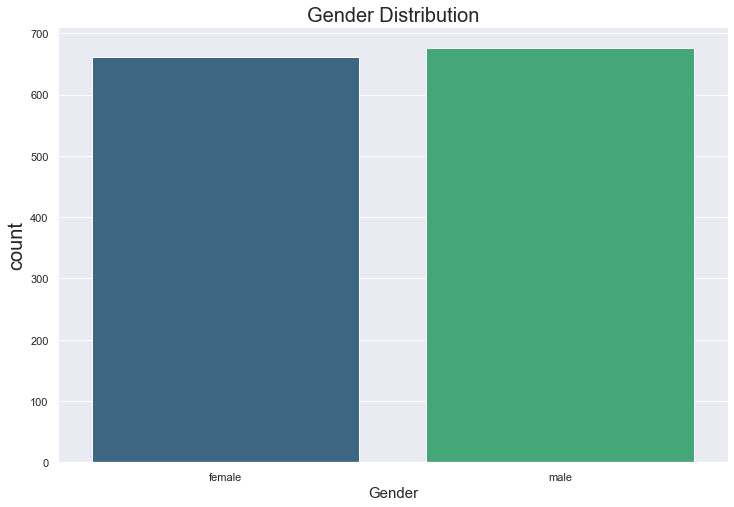

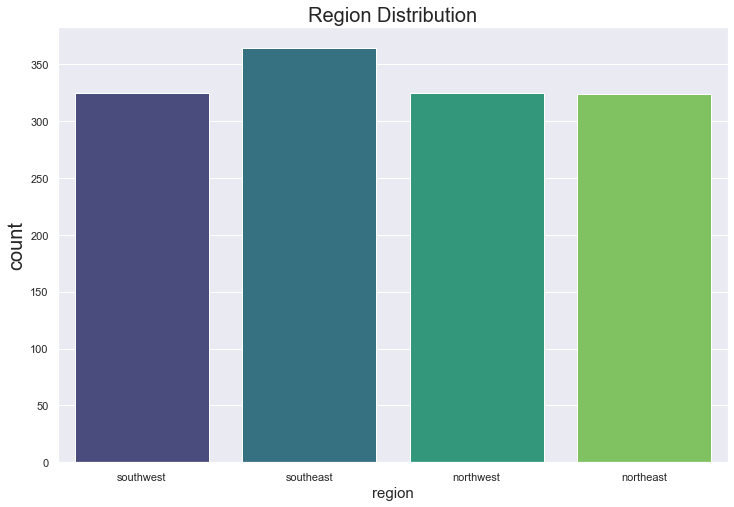

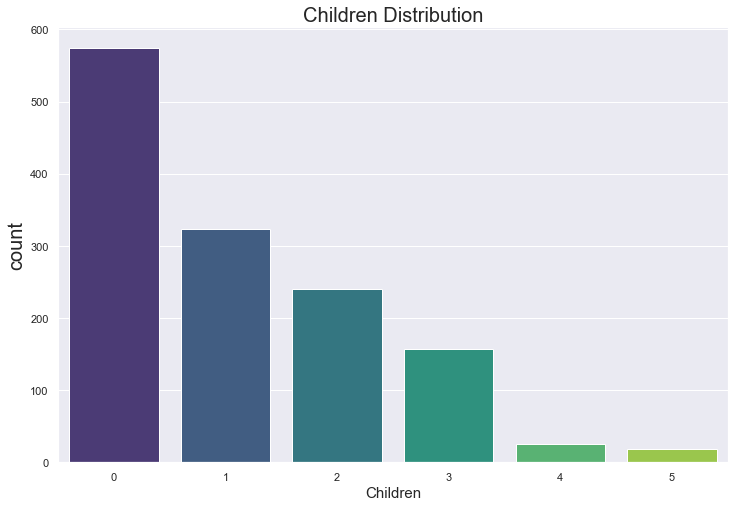

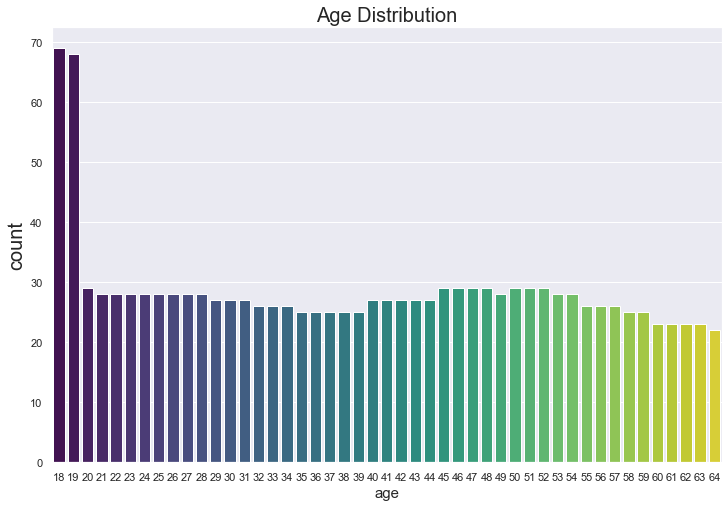

In [14]:
# # visualizing data to make analysis

 
plt.figure(figsize = (12,8))
g = sns.countplot(x="smoker",data=insurance_df,palette='viridis')
g.set_title("Smokers and Non-Smokers  Distribution", fontsize=20)
g.set_xlabel("smoker", fontsize=15)
g.set_ylabel("count", fontsize=20)

plt.figure(figsize = (12,8))
g = sns.countplot(x="sex",data=insurance_df,palette='viridis')
g.set_title("Gender Distribution", fontsize=20)
g.set_xlabel("Gender", fontsize=15)
g.set_ylabel("count", fontsize=20)


plt.figure(figsize = (12,8))
g = sns.countplot(x="region",data=insurance_df,palette='viridis')
g.set_title("Region Distribution", fontsize=20)
g.set_xlabel("region", fontsize=15)
g.set_ylabel("count", fontsize=20)

plt.figure(figsize = (12,8))
g = sns.countplot(x="children",data=insurance_df,palette='viridis')
g.set_title("Children Distribution", fontsize=20)
g.set_xlabel("Children", fontsize=15)
g.set_ylabel("count", fontsize=20)


plt.figure(figsize = (12,8))
g = sns.countplot(x="age",data=insurance_df,palette='viridis')
g.set_title("Age Distribution", fontsize=20)
g.set_xlabel("age", fontsize=15)
g.set_ylabel("count", fontsize=20)

Output should include this Analysis:

- There are lot more non-smokers than smokers.

- Instances are distributed evenly accross all regions.

- Gender is also distributed evenly.

- Most instances have less than 3 children and very few have 4 or 5 children.

## 3.1 <i>Multivariate Analyses</i>

Text(0.5, 1.0, 'Heatmap for Highest correlated features for Carsale datset')

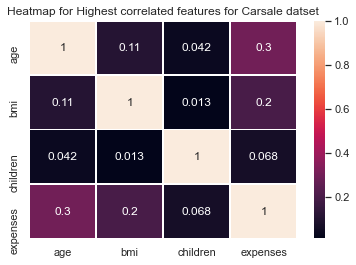

In [15]:
sns.heatmap(insurance_df.corr(),annot=True, linewidths=.5)
plt.title("Heatmap for Highest correlated features for Carsale datset")

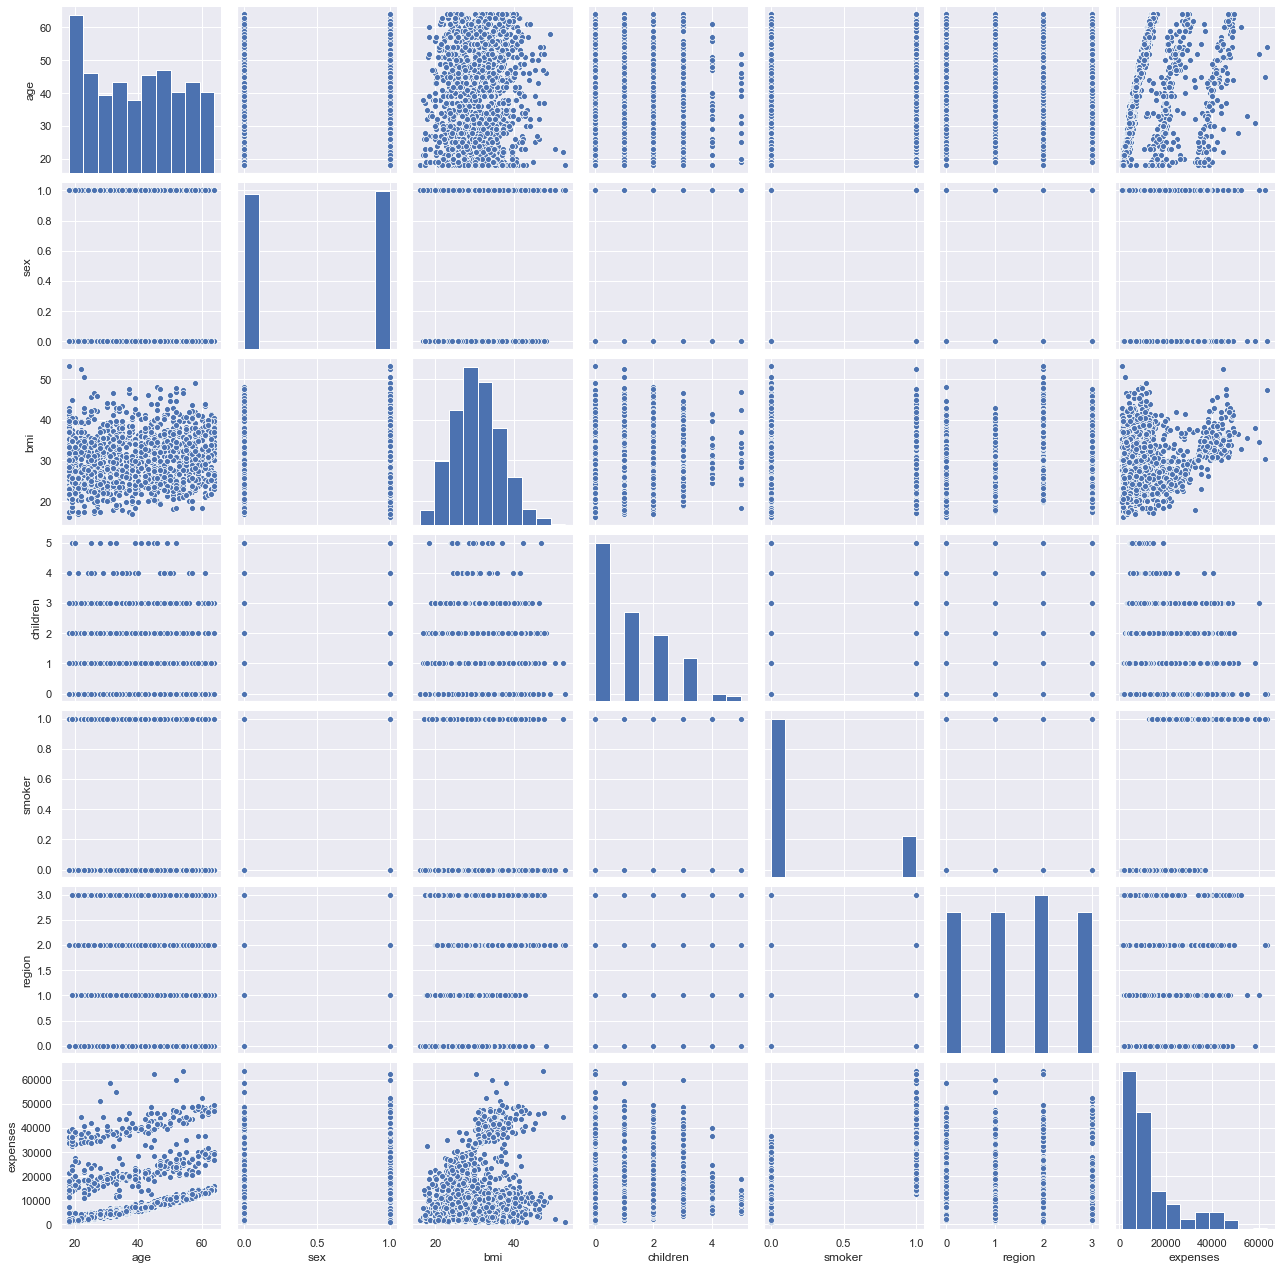

In [16]:
# Label encoding the variables before doing a pairplot because pairplot ignores strings

insurance_df_encoded = copy.deepcopy(insurance_df) ### Your Code Here
insurance_df_encoded.loc[:,['sex', 'smoker', 'region']] = insurance_df_encoded.loc[:,['sex', 'smoker', 'region']].apply(LabelEncoder().fit_transform) 

sns.pairplot(insurance_df_encoded)  # pairplot
plt.show()

Output should include this Analysis:

- There is an obvious correlation between 'charges' and 'smoker'

- Looks like smokers claimed more money than non-smokers

- There's an interesting pattern between 'age' and 'charges'. Notice that older people are charged more than the younger ones

# Task 4: Analyzing trends, patterns, and relationships in the Data.

<AxesSubplot:xlabel='expenses', ylabel='smoker'>

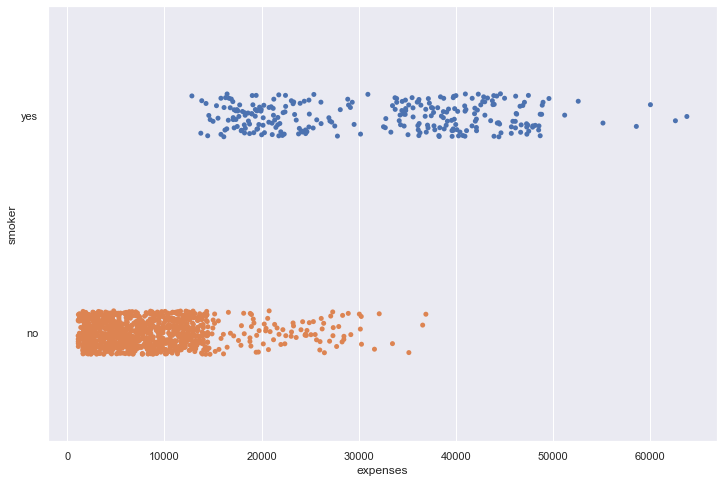

In [17]:
# Do charges of people who smoke differ significantly from the people who don't?
plt.figure(figsize=(12,8))
sns.stripplot(insurance_df['expenses'], insurance_df['smoker'])


In [18]:
# Do charges of people who smoke differ significantly from the people who don't?
print("Do charges of people who smoke differ significantly from the people who don't?")
insurance_df.smoker.value_counts()

Do charges of people who smoke differ significantly from the people who don't?


no     1064
yes     274
Name: smoker, dtype: int64

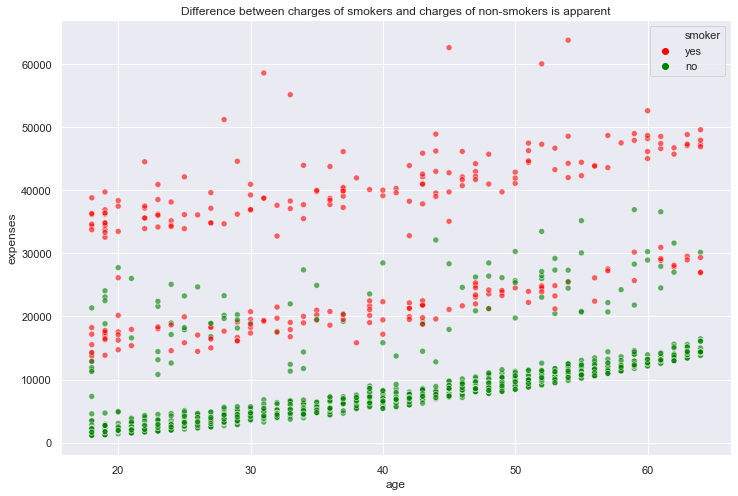

In [19]:
# Scatter plot to look for visual evidence of dependency between attributes smoker and charges accross different ages
plt.figure(figsize=(12,8))
sns.scatterplot(insurance_df.age, insurance_df.expenses,hue=insurance_df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.title("Difference between charges of smokers and charges of non-smokers is apparent")
plt.show()



Output should include this Analysis:

- There are expenses are high for smokers while no smokers have average expense.


<AxesSubplot:xlabel='age', ylabel='expenses'>

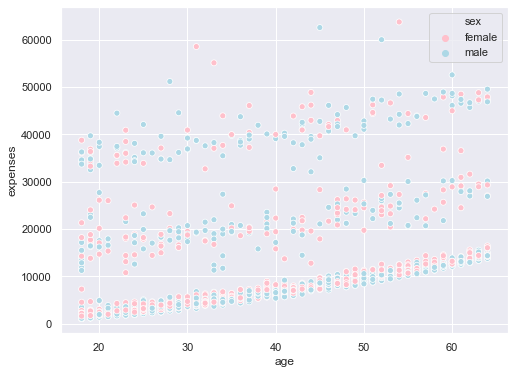

In [20]:
plt.figure(figsize=(8,6))
sns.scatterplot(insurance_df.age, insurance_df.expenses,hue=insurance_df.sex,palette= ['pink','lightblue'] )

There is no apparent relation between gender and charges

In [21]:
# T-test to check dependency of smoking on charges
Ho = "Charges of smoker and non-smoker are same"   # Stating the Null Hypothesis
Ha = "Charges of smoker and non-smoker are not the same"   # Stating the Alternate Hypothesis

x = np.array (insurance_df[insurance_df.smoker == 'yes'].expenses)
y = np.array (insurance_df[insurance_df.smoker == 'No'].expenses)

t, p_value  = stats.ttest_ind(x,y, axis = 0)  # Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value}) > 0.05')

Charges of smoker and non-smoker are same as the p_value (nan) > 0.05


Thus, Smokers seem to claim significantly more money than non-smokers

In [22]:
#Does bmi of males differ significantly from that of females?
print ("Does bmi of males differ significantly from that of females?")
insurance_df.sex.value_counts()   #Checking the distribution of males and females

Does bmi of males differ significantly from that of females?


male      676
female    662
Name: sex, dtype: int64

Does not differ beacause they are almost equal in no's.

In [23]:
# T-test to check dependency of bmi on gender
Ho = "Gender has no effect on bmi"   # Stating the Null Hypothesis
Ha = "Gender has an effect on bmi"

x = np.array(insurance_df[insurance_df.sex == 'male'].bmi) 
y= np.array(insurance_df[insurance_df.sex == 'female'].bmi)
t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

Gender has no effect on bmi as the p_value (0.09) > 0.05


bmi of both the genders are identical


In [24]:
#Is the proportion of smokers significantly different in different genders?


# Chi_square test to check if smoking habits are different for different genders
Ho = "Gender has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Gender has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['sex'],insurance_df['smoker']) 

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Gender has an effect on smoking habits as the p_value (0.007) < 0.05


smoker,no,yes
sex,,
female,547,115
male,517,159


Beacause p-Value is less than 0.05

Proportion of smokers in males is significantly different from that of the females



In [25]:
# Chi_square test to check if smoking habits are different for people of different regions
Ho = "Region has no effect on smoking habits"   # Stating the Null Hypothesis
Ha = "Region has an effect on smoking habits"   # Stating the Alternate Hypothesis

crosstab = pd.crosstab(insurance_df['smoker'], insurance_df['region'])

chi, p_value, dof, expected =  stats.chi2_contingency(crosstab)

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')
crosstab

Region has no effect on smoking habits as the p_value (0.062) > 0.05


region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


* Smoking habbits of people of different regions are similar


In [26]:
# Is the distribution of bmi across women with no children, one child and two children, the same ?
# Test to see if the distributions of bmi values for females having different number of children, are significantly different

Ho = "No. of children has no effect on bmi"   # Stating the Null Hypothesis
Ha = "No. of children has an effect on bmi"   # Stating the Alternate Hypothesis


female_df = copy.deepcopy(insurance_df[insurance_df['sex'] == 'female']) ### Your Code Here

zero = female_df[female_df.children == 0 ]['bmi'] 
one = female_df[female_df.children == 1]['bmi']
two = female_df[female_df.children == 2]['bmi']


f_stat, p_value = stats.f_oneway(zero,one,two)


if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round(3)}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

No. of children has no effect on bmi as the p_value (0.715) > 0.05


## 4.Conclusion

- With the help of notebook I learnt how exploratory data analysis can be carried out using Pandas plotting.
- Also I have seen making use of packages like __matplotlib and seaborn__ to develop better insights about the data.<br/>
- I have also seen how __preproceesing__ helps in dealing with Scaling.
- I have seen the impact of columns like __bmi, age and expenses on the smoker increase/decrease rate__.
- The most important inference drawn from all this analysis is, I get to know how to apply T-test.__ 
- This analysis will help me to Analyze __machine learning Projects__ in later terms and projects. 

## END